# **1. Perkenalan Dataset**


# Pengenalan Dataset: Bank Customer Churn

Dataset yang digunakan berasal dari **Bank Customer Churn Dataset**, yaitu kumpulan data pelanggan bank yang bertujuan untuk memprediksi apakah seorang pelanggan akan berhenti menggunakan layanan bank (churn) atau tetap aktif. Dataset ini sering digunakan untuk **analisis retensi pelanggan**, **machine learning supervised classification**, serta **eksperimen MLOps** karena memiliki kombinasi fitur numerik dan kategorikal yang seimbang.  

Dataset ini bersifat publik dan banyak digunakan untuk keperluan edukasi dan eksperimen prediksi churn. Dataset mencerminkan perilaku nyata pelanggan bank, walaupun data ini disediakan dalam bentuk fiktif.

### 🎯 Tujuan Penggunaan Dataset
- Menganalisis karakteristik pelanggan bank.  
- Memahami faktor-faktor yang mempengaruhi churn.  
- Mengembangkan model prediksi churn menggunakan machine learning.

### 🧮 Jumlah Data
- **Baris (Rows):** 10.000 pelanggan (contoh; sesuaikan jika berbeda)  
- **Kolom (Features):** 14 fitur + 1 target (Churn)

### 🧩 Deskripsi Kolom

| Fitur | Tipe | Deskripsi |
|-------|------|-----------|
| RowNumber | int | Nomor baris pelanggan |
| CustomerId | object | ID unik pelanggan |
| Surname | object | Nama belakang pelanggan |
| CreditScore | int | Skor kredit pelanggan |
| Geography | categorical | Negara/Daerah pelanggan |
| Gender | categorical | Jenis kelamin pelanggan |
| Age | int | Usia pelanggan |
| Tenure | int | Lama menjadi nasabah (tahun) |
| Balance | float | Saldo rekening nasabah |
| NumOfProducts | int | Jumlah produk yang dimiliki |
| HasCrCard | int | Memiliki kartu kredit (0/1) |
| IsActiveMember | int | Status keaktifan nasabah (0/1) |
| EstimatedSalary | float | Perkiraan penghasilan tahunan |
| Extited | categorical | Target prediksi: 1 = churn, 0 = tetap |



# **2. Import Library**

Pada tahap ini, perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
# Manipulasi data
import pandas as pd
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Mengabaikan warning yang tidak terlalu penting
import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSzhHCHLSCqZ1wFUBxUo4FsGbuvKuvxSiNo6vFxqy3v-3e6Fh51nk9pWU87-BxOv2VxhFD1U1aLI2SU/pub?gid=826766192&single=true&output=csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# Melihat bentuk dataset
print("Shape Dataset")
df.shape

Shape Dataset


(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Dataset terdiri dari variabel numerik dan kategorikal yang merepresentasikan profil demografis, finansial, dan perilaku nasabah bank. Variabel Exited digunakan sebagai target untuk mengidentifikasi nasabah yang berhenti berlangganan.

In [5]:
# Statistik deskriptif
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Interpretasi:

Rata-rata usia nasabah berada pada rentang usia produktif

Saldo (Balance) menunjukkan variasi tinggi, mengindikasikan segmentasi finansial yang beragam

CreditScore relatif terdistribusi normal

In [6]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


## **Analisis Target (Exited)**

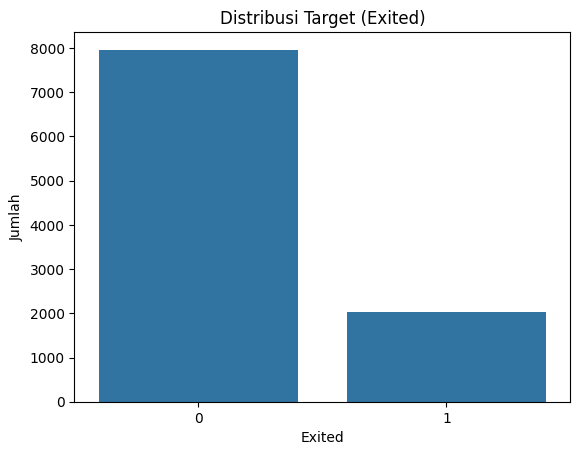

In [7]:
plt.figure()
sns.countplot(x='Exited', data=df)
plt.title('Distribusi Target (Exited)')
plt.xlabel('Exited')
plt.ylabel('Jumlah')
plt.show()

In [8]:
df['Exited'].value_counts(normalize=True) * 100

,proportion
Exited,
0,79.63
1,20.37


## **Analisis Fitur Numerik**

In [9]:
numerical_features = [
    'CreditScore', 'Age', 'Tenure',
    'Balance', 'NumOfProducts', 'EstimatedSalary'
]

### **Distribusi Numerik**

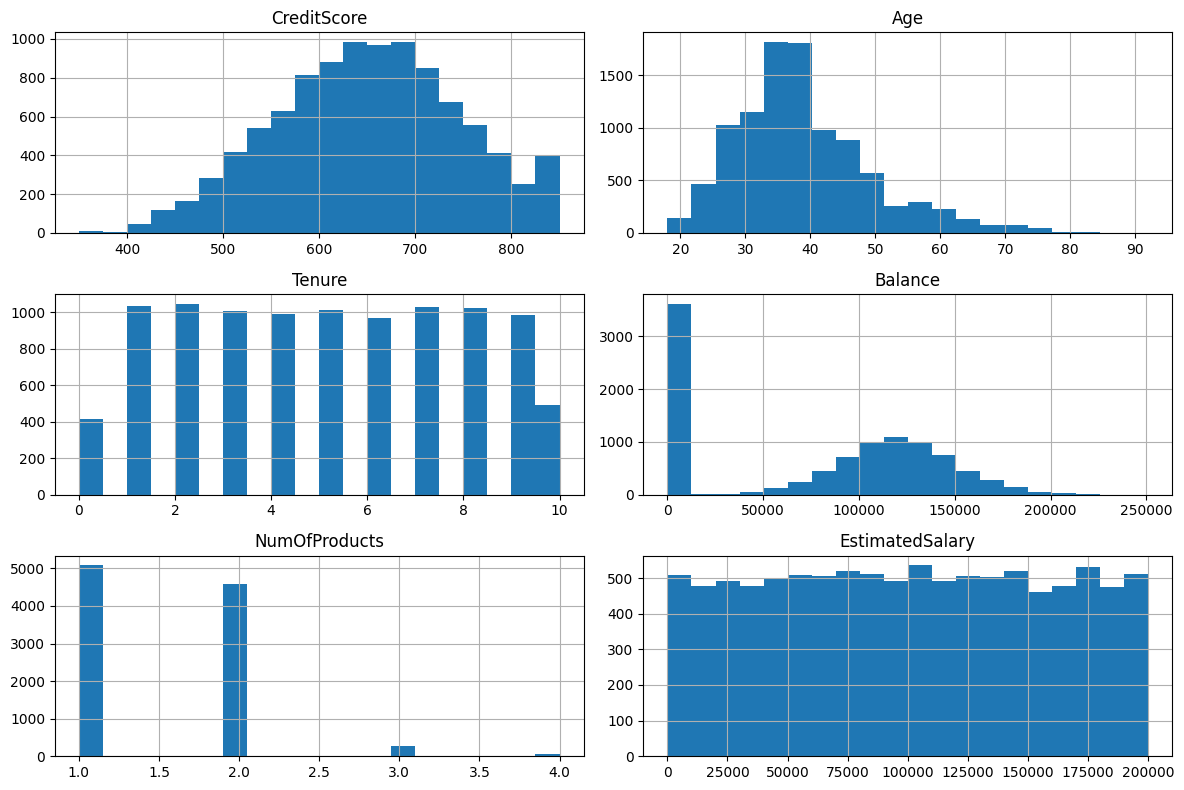

In [10]:
df[numerical_features].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

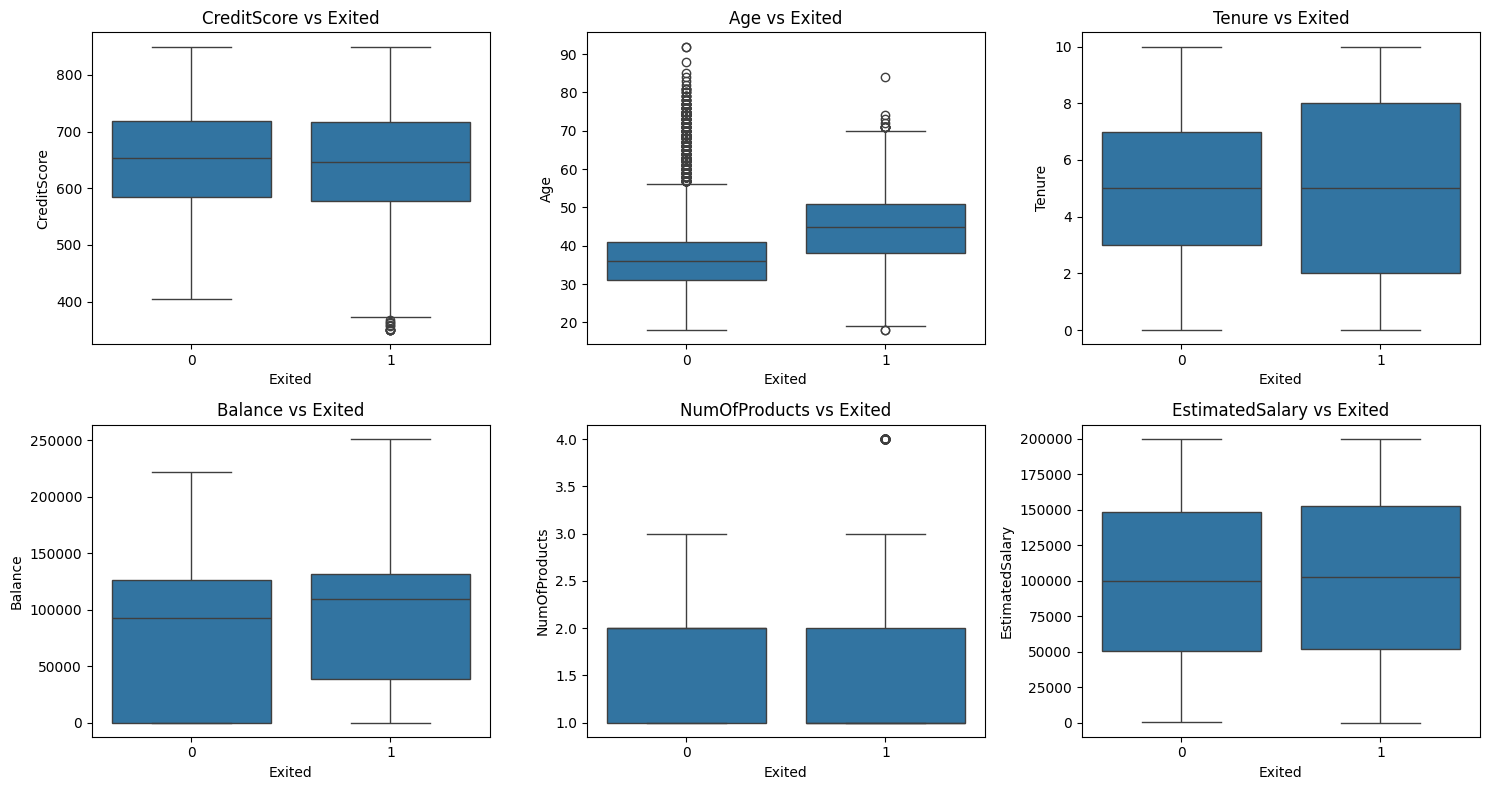

In [11]:
plt.figure(figsize=(15, 8))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(
        x='Exited',
        y=col,
        data=df
    )
    plt.title(f'{col} vs Exited')

plt.tight_layout()
plt.show()

## **Analisis Fitur Kategorikal**

### **Geography**

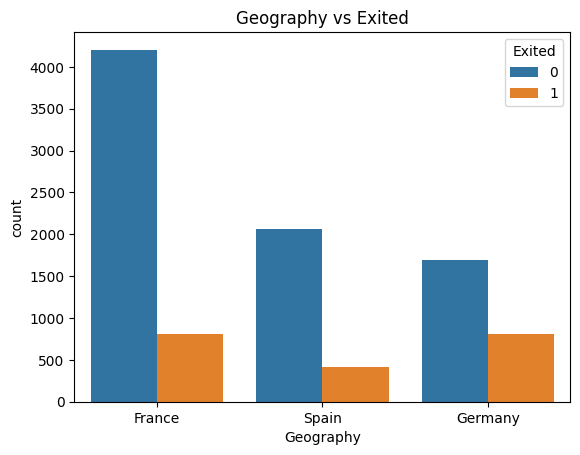

In [12]:
plt.figure()
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title('Geography vs Exited')
plt.show()

### **Gender**

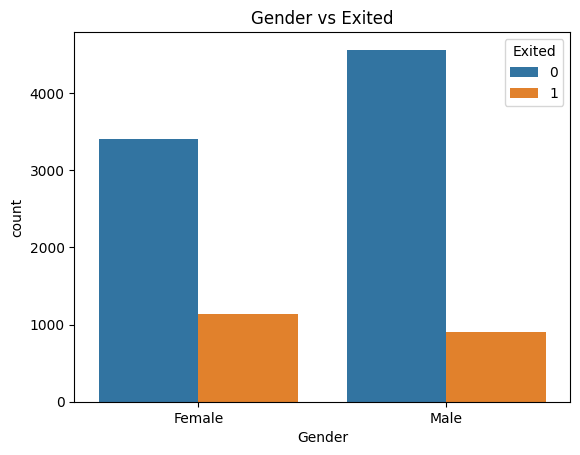

In [13]:
plt.figure()
sns.countplot(x='Gender', hue='Exited', data=df)
plt.title('Gender vs Exited')
plt.show()

## **Analisis Fitur Biner**

### **HasCrCard**

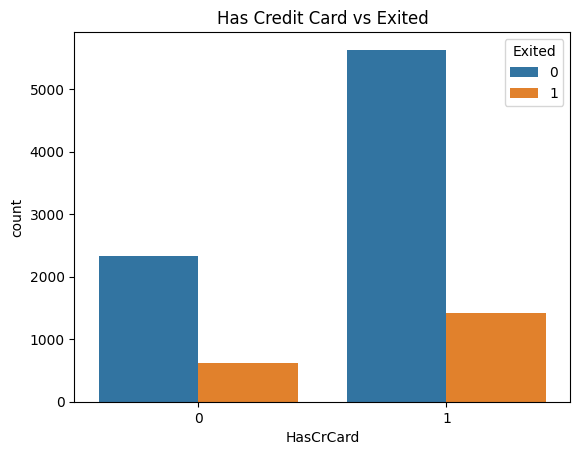

In [14]:
plt.figure()
sns.countplot(x='HasCrCard', hue='Exited', data=df)
plt.title('Has Credit Card vs Exited')
plt.show()

### **IsActiveMember**

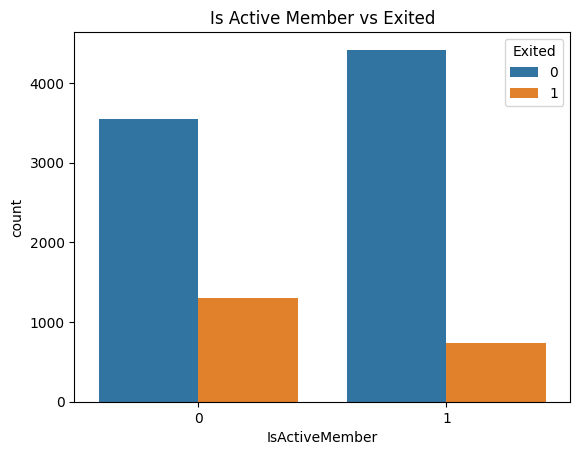

In [15]:
plt.figure()
sns.countplot(x='IsActiveMember', hue='Exited', data=df)
plt.title('Is Active Member vs Exited')
plt.show()

## **Korelasi Antar Fitur**

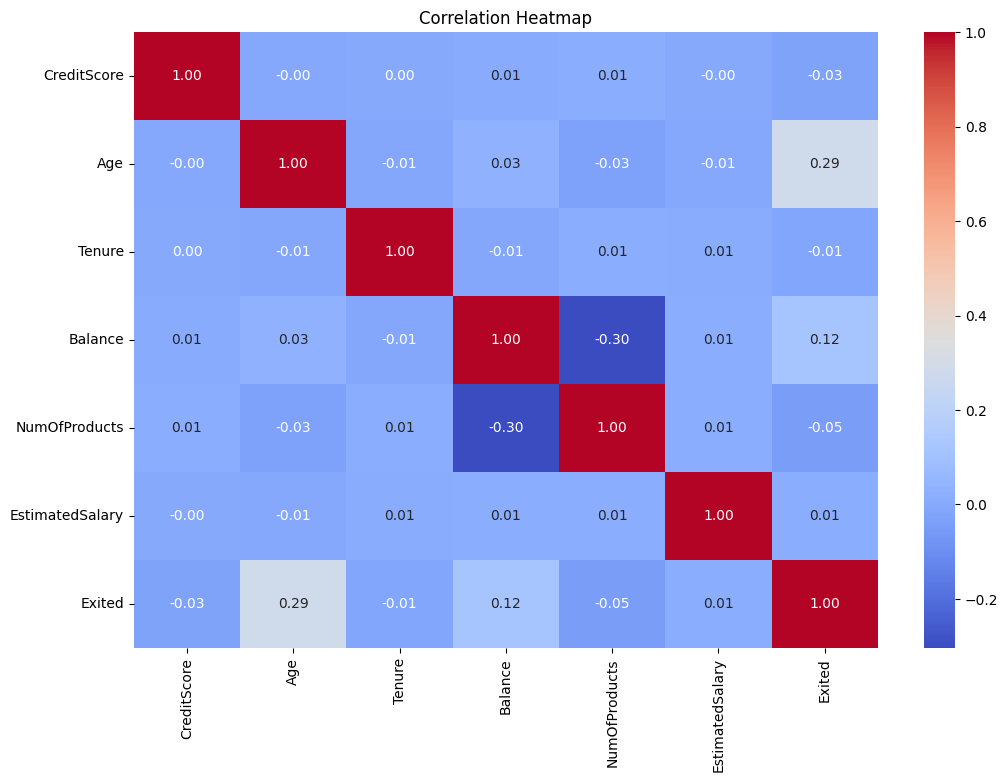

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    df[numerical_features + ['Exited']].corr(),
    annot=True,
    fmt=".2f",
    cmap='coolwarm'
)
plt.title('Correlation Heatmap')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## **Missing Values**

In [17]:
df.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


tidak ditemukan missing value pada dataset.

## **Duplicated Check**

In [18]:
print(f"Jumlah nilai duplikat: {df.duplicated().sum()}")

Jumlah nilai duplikat: 0


Tidak ditemukan data duplikat pada dataset sehingga tidak diperlukan penghapusan data.

## **Feature Selection (Drop Identifier Columns)**

In [19]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

## **Encode Fitur Kategorikal**

In [20]:
# Cari kolom kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns

# Label encoding hanya untuk kolom kategori aktif
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print("[INFO] Kolom yang diencode:", list(categorical_cols))

[INFO] Kolom yang diencode: ['Geography', 'Gender']


## **Outlier Values**

In [21]:
numeric_cols_no_target = df.drop(columns=['Exited']).select_dtypes(
    include=['int64', 'float64']
).columns

outlier_count = {}

for col in numeric_cols_no_target:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count[col] = len(outliers)

outlier_count


{'CreditScore': 15,
 'Geography': 0,
 'Gender': 0,
 'Age': 359,
 'Tenure': 0,
 'Balance': 0,
 'NumOfProducts': 60,
 'HasCrCard': 0,
 'IsActiveMember': 0,
 'EstimatedSalary': 0}

Pengecekan outlier dilakukan menggunakan metode Interquartile Range (IQR) pada fitur numerik.
Hasil menunjukkan adanya nilai ekstrem pada fitur Age, NumOfProducts, dan CreditScore.
Outlier tidak dihapus karena masih merepresentasikan kondisi nyata pelanggan dan tidak mengganggu proses analisis pada tahap eksperimen.

In [22]:
print("Shape dataset setelah preprocessing:", df.shape)
df.head()

Shape dataset setelah preprocessing: (10000, 11)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [23]:
df.to_csv('churn_preprocessing.csv')